In [3]:
from pyfluids import Fluid, FluidsList,Input
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib import font_manager
from matplotlib.ticker import MultipleLocator as mtl, FuncFormatter as fontf
from Casos import  (data_1A,data_1BC,data_2A,data_2BC,data_3ABC,data_EPI,data_NRTC,data_4A,data_4BC,data_EPI) 
from cycler import cycler 
cores=plt.get_cmap("Set2").colors
plt.rc('axes', prop_cycle=cycler('color', cores))

fluids = [fluid.name for fluid in FluidsList]
fluids


['Acetone',
 'Air',
 'Ammonia',
 'Argon',
 'Benzene',
 'Butene',
 'CarbonDioxide',
 'CarbonMonoxide',
 'CarbonylSulfide',
 'cis2Butene',
 'CycloHexane',
 'CycloPentane',
 'CycloPropane',
 'D4',
 'D5',
 'D6',
 'Deuterium',
 'Dichloroethane',
 'DiethylEther',
 'DimethylCarbonate',
 'DimethylEther',
 'Ethane',
 'Ethanol',
 'EthylBenzene',
 'Ethylene',
 'EthyleneOxide',
 'Fluorine',
 'HeavyWater',
 'Helium',
 'HFE143m',
 'Hydrogen',
 'HydrogenChloride',
 'HydrogenSulfide',
 'IsoButane',
 'IsoButene',
 'Isohexane',
 'Isopentane',
 'Krypton',
 'MD2M',
 'MD3M',
 'MD4M',
 'MDM',
 'Methane',
 'Methanol',
 'MethylLinoleate',
 'MethylLinolenate',
 'MethylOleate',
 'MethylPalmitate',
 'MethylStearate',
 'MM',
 'mXylene',
 'nButane',
 'nDecane',
 'nDodecane',
 'Neon',
 'Neopentane',
 'nHeptane',
 'nHexane',
 'Nitrogen',
 'NitrousOxide',
 'nNonane',
 'nOctane',
 'Novec649',
 'nPentane',
 'nPropane',
 'nUndecane',
 'OrthoDeuterium',
 'OrthoHydrogen',
 'Oxygen',
 'oXylene',
 'ParaDeuterium',
 'ParaHyd

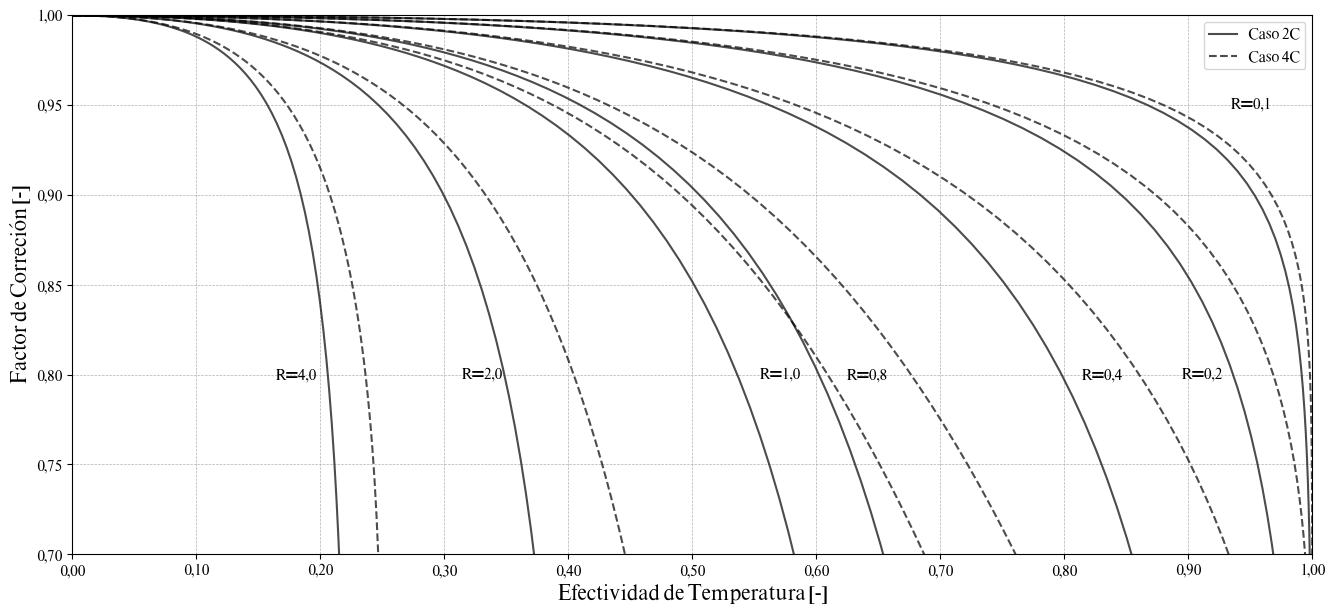

In [40]:
def format_func(value,tick_number):
    return f'{value:.2f}'.replace('.', ',')


font_path = './OPTITimes-Roman.otf'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

def legend_plot(ax,x,y,R):
  
    lege = f'R={R}'.replace('.',',')
    ax.text(x, y, lege, va='center', ha='center', fontsize=10,
        fontproperties=font_prop)
 
N_p = 1
N_r = 10
idioma = 2
dic  = data_2BC(N_p,N_r,'2C',[4,2,1,0.8,0.4,0.2,0.1])
dic1 = data_4BC(N_p,N_r,'4C',[4,2,1,0.8,0.4,0.2,0.1])

fig, ax =  plt.subplots(figsize=(16,7))
for i,R in enumerate(dic):
    if i ==0:

        label1 = 'Caso 2C'
        label2 = 'Caso 4C' 
    else:
        label1 = None
        label2 = None
    ax.plot(dic[R]['P'],dic[R]['F'],color = 'black', alpha = 0.7,linestyle = '-',label=label1)
    ax.plot(dic1[R]['P'],dic1[R]['F'],color = 'black', alpha = 0.7,linestyle = '--',label =label2)
    

ax.yaxis.set_major_locator(mtl(0.05))
ax.yaxis.set_minor_locator(mtl(0.05))
ax.xaxis.set_major_locator(mtl(0.1))
#ax.xaxis.set_minor_locator(mtl(0.1))
ax.xaxis.set_major_formatter(fontf(format_func))
ax.yaxis.set_major_formatter(fontf(format_func))

if idioma == 1:
    y_leged = 'Fator de Correção [-]'
    x_leged = 'Efectividade de Temperatura [-]'
else:
    y_leged = 'Factor de Correción [-]'
    x_leged = 'Efectividad de Temperatura [-]'
ax.grid(which='major', axis='both', linestyle='--', linewidth=0.5)
ax.axis([0,1,0.7,1])
ax.set_ylabel(y_leged,fontproperties=font_prop,fontsize =14)
ax.set_xlabel(x_leged,fontproperties=font_prop,fontsize =14)
ax.tick_params() 
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font_prop)   
    label.set_fontsize(10) 
plt.legend(prop=font_prop) 
y = 0.8

legend_plot(ax,0.18,y,4.0)
legend_plot(ax,0.33,y,2.0)
legend_plot(ax,0.57,y,1.0)
legend_plot(ax,0.64,y,0.8)
legend_plot(ax,0.83,y,0.4)
legend_plot(ax,0.91,y,0.2)
legend_plot(ax,0.95,y+0.15,0.1)

"""
x = [0.15,0.31,0.44,0.5,0.65,0.79,0.885]
legend_plot(ax,x[0],y,4.0)
legend_plot(ax,x[1],y,2.0)
legend_plot(ax,x[2],y,1.0)
legend_plot(ax,x[3],y,0.8)
legend_plot(ax,x[4],y,0.4)
legend_plot(ax,x[5],y,0.155)
legend_plot(ax,x[6],y,0.1)
"""
if idioma ==1:
    plt.savefig(f'imagem_portugues/2C4/casos_2C4_{N_p}_{N_r}.png', dpi=300)
else :
    plt.savefig(f'imagem_espanhol/2C4/casos_2C4_{N_p}_{N_r}.png', dpi=300)
plt.show()

In [ ]:
def state_fluid(P:float,T:float,fluid:str):
    fluid_enum = getattr(FluidsList, fluid)    
    estado = Fluid(fluid_enum).with_state(Input.pressure(P), Input.entropy(T))
    return estado
reynolds = lambda m, D, mhu: 4 * m / (np.pi * mhu * D)
nusselt =  lambda f, Re_b, Pr_b, mu_b, mu_w, n: (((f / 8) * Re_b * Pr_b) / (1.07 + 12.7 * np.sqrt(f / 8) * (Pr_b**(2/3) - 1))) * (mu_b / mu_w)**n
fric = lambda Re : (1.82*np.log10(Re)-1.64)**(-2) 
Nusselt_ext = lambda Re, Pr: (0.3 + (0.62 * Re**0.5 * Pr**(1/3)) / 
                        (1 + (0.4 / Pr)**(2/3))**(1/4) * 
                        (1 + (Re / 282000)**(5/8))**(4/5)) / (1 + (Re / 1e5)**0.5)


# Teste com diferença de temperaturas elevadas

3.504757496075132e-05
0.012053755153314975
0.024074599816872728
0.03609594383846659
0.04811757918287878
0.06013941096237164
0.07216138657828748
0.08418347323199733
0.09620564889272834
0.10822789788900745
0.12025020866009296
0.13227257234167683
0.14429498199649757
0.15631743206781337
0.168339918027202
0.18036243612401245
0.1923849832083846
0.2044075566090695
0.21643015403875132
0.22845277351982818
0.24047541332936648
0.2524980719556717
0.26452074806324793
0.27654344046643015
0.28856614810645526
0.3005888700329397
0.31261160538998184
0.3246343534025777
0.336657113367185
0.3486798846412171


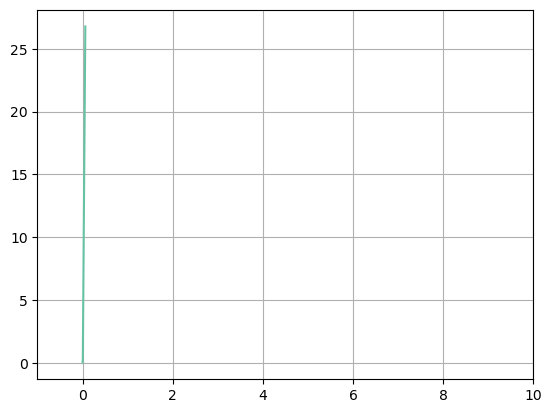

In [ ]:
P =101325 #[Pa]
n = 0.25

#! parâmetros

l  = 1
Ne = 50
x  = l/(Ne-1)
Th_int = 90
Tc_int = 20
fluid_int = 'water'
fluid_ext = 'air'
U_ar   = 30
D_int  = 0.025
D_out  = 0.033
k      = 80
m = np.linspace(0.00001,0.1,30)
Th = np.zeros(Ne)
Q_int = np.zeros(Ne)
NUT = np.zeros(len(m))
e = np.zeros(len(m))
for j,m_int in enumerate(m):

    #! propiedades (Th_int)

    state_int = state_fluid(P,Th_int,fluid_int)
    prop_int = {
    'rho' : state_int.density,
    'mhu' : state_int.dynamic_viscosity ,
    'v'   : state_int.kinematic_viscosity,
    'pr'  : state_int.prandtl,
    'k'   : state_int.conductivity,
    'cp'  : state_int.specific_heat
    }

    #! propiedades (Tc_int)

    state_ext = state_fluid(P,Tc_int,fluid_ext)
    prop_ext ={
    'rho' : state_ext.density,
    'mhu' : state_ext.dynamic_viscosity, 
    'v'   : state_ext.kinematic_viscosity,
    'k'   : state_ext.conductivity,
    'pr'  : state_ext.prandtl,
    'cp'  : state_ext.specific_heat
    }
    m_ar = U_ar*l*D_out*prop_ext['rho'] 
    for i in range(0,Ne):

        T_prueba = np.linspace(min(Tc_int,Th_int),max(Tc_int,Th_int),50)

        for T_w in T_prueba:

            #! Calculo do coeficiente de convecção interno

            Re = reynolds(m_int,D_int,prop_int['mhu'])
            f_int  = fric(Re)
            mhu_w = state_fluid(P,T_w,fluid_int).dynamic_viscosity
            Nu = nusselt(f_int, Re, prop_int['pr'], prop_int['mhu'], mhu_w , n)
            h_int = Nu*prop_int['k']/D_int


            #! Calculo do coeficiente de convecção externo

            Re_ext = U_ar*D_out/prop_ext['v']
            Nu_ext = Nusselt_ext(Re_ext,prop_ext['pr'])
            h_ext = Nu_ext*prop_ext['k']/D_out


            #! Resistencias termicas

            R_cond = np.log(D_out/D_int)/(2*np.pi*x*k)
            R_h_int = 1/ (h_int*np.pi*D_int*x)
            R_h_ext = 1/ (h_ext*np.pi*D_out*x)
            R_total = R_cond+R_h_ext+R_h_int
            q = (Th_int-Tc_int)/(R_total)
            Tw_i = -q*R_h_int + Th_int

            if abs(Tw_i-T_w) <= 0.1:
                break
            
        Th[i] = -q/(prop_int['cp']*m_int)+Th_int
        Th_int = Th[i]
        Q_int[i] = q

    Cmin = min(prop_int['cp']*m_int, m_ar*prop_ext['cp'])
    Cmax = max(prop_int['cp']*m_int, m_ar*prop_ext['cp'])
    print(Cmin/Cmax)
    NUT[j] = 1/(R_total*Cmin)
    e[j] = sum(Q_int)/(Cmin*(Th_int-Tc_int))
plt.plot(NUT,e)
plt.xlim(-1,10)
plt.grid()
plt.show()


In [9]:
def state_fluid(P:float,T:float,fluid:str):
    fluid = fluid.capitalize()
    fluid_enum = getattr(FluidsList, fluid)    
    estado = Fluid(fluid_enum).with_state(Input.pressure(P), Input.temperature(T))
    return estado
reynolds = lambda m, D, mhu: 4 * m / (np.pi * mhu * D)
nusselt =  lambda f, Re_b, Pr_b, mu_b, mu_w, n: (((f / 8) * Re_b * Pr_b) / (1.07 + 12.7 * np.sqrt(f / 8) * (Pr_b**(2/3) - 1))) * (mu_b / mu_w)**n
fric = lambda Re : (1.82*np.log10(Re)-1.64)**(-2) 
def Nusselt_ext(Re,pr):
    c = 1/3
    if 4<=Re<40:
        a,b = 0.911,0.385
    if 40<=Re<4000:
        a,b = 0.683,0.466
    if 4000<=Re<40000:
        a,b = 0.193,0.618
    if 40000<=Re:
        a,b = 0.027,0.805
    Nu = a*(Re**b)*pr**c
    return Nu
def dic_properts(Th,fluid_int,Tc,fluid_ext):
    state_int = state_fluid(P,Th,fluid_int)
    prop_int = {
    'rho' : state_int.density,
    'mhu' : state_int.dynamic_viscosity ,
    'v'   : state_int.kinematic_viscosity,
    'pr'  : state_int.prandtl,
    'k'   : state_int.conductivity,
    'cp'  : state_int.specific_heat
    }

    #! propiedades (Tc_int)

    state_ext = state_fluid(P,Tc,fluid_ext)
    prop_ext ={
    'rho' : state_ext.density,
    'mhu' : state_ext.dynamic_viscosity, 
    'v'   : state_ext.kinematic_viscosity,
    'k'   : state_ext.conductivity,
    'pr'  : state_ext.prandtl,
    'cp'  : state_ext.specific_heat
}
    return prop_int,prop_ext

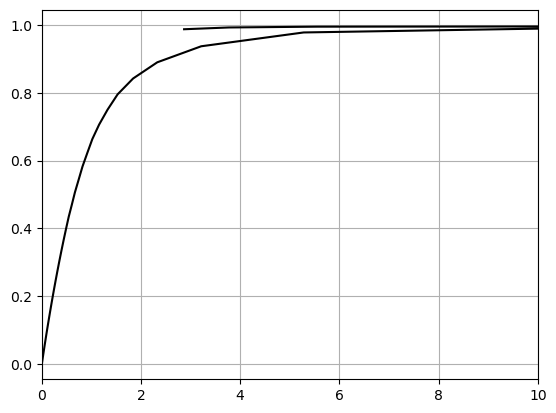

In [65]:
P = 101325
l  = 1
n = 0.25
Ne = 100
x  = l/(Ne-1)
Th_int = 90
Tc_int = 20
fluid_int = 'water'
fluid_ext = 'air'
D_int  = 0.025
D_out  = 0.033
k      = 80
m_int  = 10000
Th = np.zeros(Ne) 
Q = np.zeros(Ne)
Th = np.zeros(Ne+1)
Th[0] = Th_int 
Tc = np.full(Ne+1,Tc_int)
m = np.geomspace(0.001,10,50)
NTU = np.zeros(len(m))
e = np.zeros(len(m))
C = 0.33     
for j,m_ar in enumerate(m):
    Cmax = m_ar*state_fluid(P,Tc_int,fluid_ext).specific_heat
    Cmin = C*Cmax
    m_int = Cmin/state_fluid(P,Th_int,fluid_int).specific_heat
    #! Calculo do coeficiente de convecção interno
    for i in range(0,Ne):
        prop_int,prop_ext = dic_properts(Th[i],fluid_int,Tc[i],fluid_ext) 
        T_prueba = np.linspace(Tc_int,Th_int,25)
        for T_w in T_prueba:
            Re = reynolds(m_int,D_int,prop_int['mhu'])
            f_int  = fric(Re)
            mhu_w = state_fluid(P,T_w,fluid_int).dynamic_viscosity
            Nu = nusselt(f_int, Re, prop_int['pr'], prop_int['mhu'], mhu_w , n)
            h_int = Nu*prop_int['k']/D_int


            #! Calculo do coeficiente de convecção externo

            Re_ext = U_ar*D_out/prop_ext['v']
            Nu_ext = Nusselt_ext(Re_ext,prop_ext['pr'])
            h_ext = Nu_ext*prop_ext['k']/D_out


            #! Resistencias termicas

            R_cond = np.log(D_out/D_int)/(2*np.pi*x*k)
            R_h_int = 1/ (h_int*np.pi*D_int*x)
            R_h_ext = 1/ (h_ext*np.pi*D_out*x)
            R_total = R_cond+R_h_ext+R_h_int
            q = (Th[i]-Tc[i])/(R_total)
            Tw = -q*R_h_int + Th[i]
            if (Tw - T_w)<0.1:
                Th[i+1] = Th[i]-q/(prop_int['cp']*m_int)
                Q[i] = q            
                break 

    
    NTU[j] = 1/(R_total*(Cmin/100))
    e[j] = sum(Q)/(Cmin*(Th_int-Tc_int))  
plt.plot(NTU,e,color = 'black')
plt.grid()
plt.xlim(0,10)
plt.show()